In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

# reading CSV file and update dataframe

loan_df = pd.read_csv('G://Rujuta//Upgrad//StatisticEssentials//LendingClub-CaseStudy//loan.csv')




## CLEAN DATA

In [2]:
# drop the columns AX and ahead as not relevant as most holding NA values
loan_df = loan_df.dropna(axis='columns', how ='all')

print(loan_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [3]:

print ("\n Loan Status: \n", loan_df.loan_status.value_counts())
print ("\n Interest Rate: \n", loan_df.int_rate.value_counts())
print ("\n Loan Amount: \n", loan_df.loan_amnt.value_counts())
print ("\n Term:\n ", loan_df.term.value_counts())
print ("\n Grade: \n", loan_df.grade.value_counts())
print ("\n Home Ownership:\n ", loan_df.home_ownership.value_counts())
print ("\n Verification Status:\n ", loan_df.verification_status.value_counts())
print ("\n Payment Plan: \n", loan_df.pymnt_plan.value_counts())
print ("\n Purpose: \n", loan_df.purpose.value_counts())
print ("\n Customer Title:\n ", loan_df.title.value_counts())
print ("\n dti:\n ", loan_df.dti.describe())
print ("\n delinq_2yrs: ", loan_df.delinq_2yrs.describe())
print ("\n earliest_cr_line:\n ", loan_df.earliest_cr_line.value_counts())
print ("\n Number of derogatory public records: ", loan_df.pub_rec.describe())
print ("\n Total Accounts:\n ", loan_df.total_acc.value_counts())
print ("\n pub_rec_bankruptcies: ", loan_df.pub_rec_bankruptcies.value_counts())




 Loan Status: 
 Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

 Interest Rate: 
 14.65%    39707
15.96%        2
12.69%        2
13.49%        1
10.65%        1
7.90%         1
21.28%        1
18.64%        1
15.27%        1
Name: int_rate, dtype: int64

 Loan Amount: 
 10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
19275       1
21450       1
16350       1
13425       1
25400       1
Name: loan_amnt, Length: 885, dtype: int64

 Term:
   36 months    29096
 60 months    10621
Name: term, dtype: int64

 Grade: 
 B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

 Home Ownership:
  RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

 Verification Status:
  Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

 Paymen

In [4]:

# drop rows with loan status = current 
loan_df = loan_df[~(loan_df.loan_status == "Current")]

# make term numeric by removing post-fix months 

loan_df.term = loan_df.term.apply(lambda x: x.replace(" months", ""))
loan_df.term = loan_df.term.astype(int)

# define function to clean up emp_length column and derived continuous variable "emp_len" 
# where <= 1 yr is also considered 1 and >= 10 yrs considered 10

def clean_year(x):
    if ("10+ years" in x):
        return 10

    elif ("< 1 year" in x):
        return 1

    elif ("years" in x):
         return (x.replace("years",""))
             
    elif ("year" in x):
         return (x.replace("year",""))
        
    elif ("nan" in x):
         return 0
    
    else:
        return x
                

loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  int32  
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [5]:
loan_df.emp_length = loan_df.emp_length.astype('str')
loan_df['emp_len'] = loan_df.emp_length.apply(clean_year)
loan_df.emp_len = loan_df.emp_len.astype('int')
loan_df.emp_len = loan_df.emp_len.sort_values()
print ("Job Duration in years:\n", loan_df.emp_len.value_counts())

Job Duration in years:
 10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_len, dtype: int64


In [6]:
# checking client's annual income range 

loan_df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [7]:
# int_rate ... remove % sign 
loan_df['int_rate'] = loan_df.int_rate.apply(lambda x: x.replace("%", ""))
loan_df['int_rate'] = loan_df['int_rate'].astype("float")
loan_df['int_rate'].value_counts()


14.65    38568
15.96        2
13.49        1
10.65        1
7.90         1
21.28        1
12.69        1
18.64        1
15.27        1
Name: int_rate, dtype: int64

## Derived Variables 

In [8]:



# new continuous variable added as 'income_b' to state income bucket like 50K to 600 K
def amt_bucket_func(x):
    if (x <= 50000):
        return 50
    elif (x <= 100000):
        return 100
    elif (x <= 200000):
        return 200
    elif (x <= 300000):
        return 300
    elif (x <= 400000):
        return 400
    elif (x <= 500000):
        return 500
    else:
        return 600
    
def loan_bucket_func(x):
    if (x <= 5000):
        return 5
    elif (x <= 10000):
        return 10
    elif (x <= 20000):
        return 20
    elif (x <= 30000):
        return 30
    elif (x <= 40000):
        return 40
    else:
        return 50
    

loan_df['income_b'] = loan_df.annual_inc.apply(amt_bucket_func)
print ("client income buckets: \n", loan_df.income_b.value_counts())

# new continuous variable added as 'loan_amnt_b' to state loan amount bucket like 50K to 600 K
loan_df['loan_amnt_b'] = loan_df.loan_amnt.apply(loan_bucket_func)
print ("client loan amount buckets:\n ", loan_df.loan_amnt_b.value_counts())


# expected recovery is installment * term
loan_df['expected_recoveries'] = loan_df.installment * loan_df.term
loan_df.expected_recoveries.describe()

client income buckets: 
 100    17707
50     15389
200     4911
300      399
400       81
600       66
500       24
Name: income_b, dtype: int64
client loan amount buckets:
  10    12802
20    12032
5      9472
30     3536
40      735
Name: loan_amnt_b, dtype: int64


count    38577.000000
mean     13705.843014
std       9904.403378
min        564.840000
25%       6422.760000
50%      11199.960000
75%      18225.720000
max      60303.600000
Name: expected_recoveries, dtype: float64

In [9]:

loan_df['P_L'] = (loan_df.total_pymnt - loan_df.loan_amnt)/loan_df.loan_amnt*100
loan_df['P_L'].describe()


count    38577.000000
mean         7.800553
std         27.305523
min       -100.000000
25%          6.962713
50%         13.902422
75%         21.042104
max         68.885204
Name: P_L, dtype: float64

In [10]:
# creat separate dataframes for Charged_off and fully_paid loans 

loan_df_CO = loan_df[loan_df.loan_status == "Charged Off"] #Charged_off loan records
loan_df_FP = loan_df[loan_df.loan_status == "Fully Paid"] #Fully Paid loan records



0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


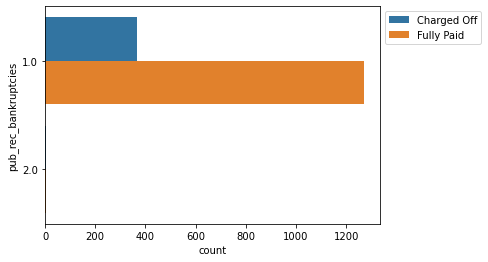

In [11]:
# pub_rec_bankruptcies

print (loan_df.pub_rec_bankruptcies.value_counts())
              
sns.countplot(y ='pub_rec_bankruptcies', hue = "loan_status", data = loan_df[loan_df.pub_rec_bankruptcies>0])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

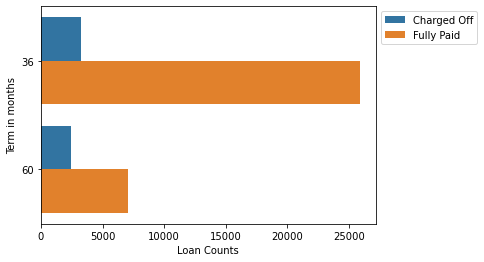

In [12]:
sns.countplot(y ='term', hue = "loan_status", data = loan_df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.xlabel('Loan Counts')
plt.ylabel('Term in months')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()



[]

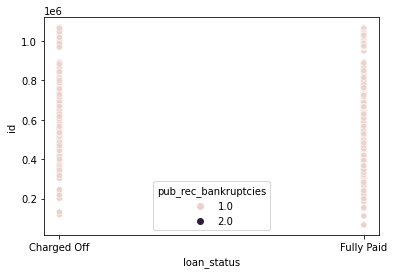

In [13]:
fig, ax = plt.subplots()
sns.scatterplot(x="loan_status", y= 'id',  hue="pub_rec_bankruptcies", data=loan_df[loan_df.pub_rec_bankruptcies>0])

plt.plot()




[]

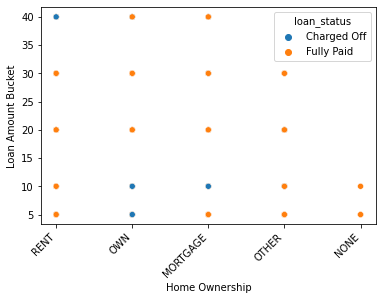

In [40]:



fig, ax = plt.subplots()
sns.scatterplot(x="home_ownership", y= 'loan_amnt_b', hue= 'loan_status', data=loan_df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize= 10  
)
plt.xlabel("Home Ownership")
plt.ylabel("Loan Amount Bucket")

plt.plot()


## Top view on profit & loss summary  

In [15]:
Total_Exp_Rec = loan_df.expected_recoveries.sum()
Total_Rec = loan_df.total_pymnt.sum()
Total_Loan_Amt = loan_df.loan_amnt.sum()
Overall_Planned_Profit_Perc = (Total_Exp_Rec-Total_Loan_Amt)/ Total_Loan_Amt*100
Overall_Actual_Profit_Perc = (Total_Rec-Total_Loan_Amt)/ Total_Loan_Amt*100

print ("\nTotal Loan amount = ", Total_Loan_Amt.round(0) )
print ("Total Planned Recovery =", Total_Exp_Rec.round(0) )
print ("Total Actual Recovery =", Total_Rec.round(0) )
print ("%Overall Planned Profit = ", Overall_Planned_Profit_Perc.round(0))
print ("%Overall Actual Profit = ", Overall_Actual_Profit_Perc.round(0))



Fully_Paid_Loan_Amt = loan_df[loan_df.loan_status == "Fully Paid"].loan_amnt.sum().round(0) 
Fully_Paid_Exp_Rec = loan_df[loan_df.loan_status == "Fully Paid"].expected_recoveries.sum().round(0)
Fully_Paid_Rec = loan_df[loan_df.loan_status == "Fully Paid"].total_pymnt.sum().round(0)
Fully_Paid_Planned_Profit_Perc = (Fully_Paid_Exp_Rec - Fully_Paid_Loan_Amt)/Fully_Paid_Loan_Amt*100
Fully_Paid_Actual_Profit_Perc = (Fully_Paid_Rec - Fully_Paid_Loan_Amt)/Fully_Paid_Loan_Amt*100

print ("\nTotal Planned Recovery for Fully-Paid loans", Fully_Paid_Exp_Rec )
print ("Total Actual Recovery for Fully-Paid loans =", Fully_Paid_Rec)
print ("%Planned Profit on Fully-Paid loans =", Fully_Paid_Planned_Profit_Perc.round(0) )
print ("%Actual Profit on Fully-Paid loans =", Fully_Paid_Actual_Profit_Perc.round(0))


Charged_Off_Loan_Amt = loan_df[loan_df.loan_status == "Charged Off"].loan_amnt.sum().round(0)
Charged_Off_Exp_Rec = loan_df[loan_df.loan_status == "Charged Off"].expected_recoveries.sum().round(0)
Charged_Off_Rec = loan_df[loan_df.loan_status == "Charged Off"].total_pymnt.sum().round(0)
Charged_Off_Loss_perc = (Charged_Off_Loan_Amt - Charged_Off_Rec)/Charged_Off_Loan_Amt*100

print ("\nTotal Planned Recovery for Charged-Off loans", Charged_Off_Exp_Rec )
print ("Total Actual Recovery for Charged-Off loans =", Charged_Off_Rec)
print ("%Actual Loss on Charged-Off loans =", Charged_Off_Loss_perc.round(0))


Total Loan amount =  426161100
Total Planned Recovery = 528730306.0
Total Actual Recovery = 457792116.0
%Overall Planned Profit =  24.0
%Overall Actual Profit =  7.0

Total Planned Recovery for Fully-Paid loans 439321840.0
Total Actual Recovery for Fully-Paid loans = 419314516.0
%Planned Profit on Fully-Paid loans = 23.0
%Actual Profit on Fully-Paid loans = 17.0

Total Planned Recovery for Charged-Off loans 89408466.0
Total Actual Recovery for Charged-Off loans = 38477600.0
%Actual Loss on Charged-Off loans = 44.0


<AxesSubplot:xlabel='income_b', ylabel='P_L'>

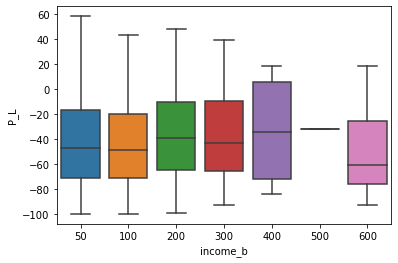

In [16]:
sns.boxplot(data=loan_df_CO, x= 'income_b', y= 'P_L')

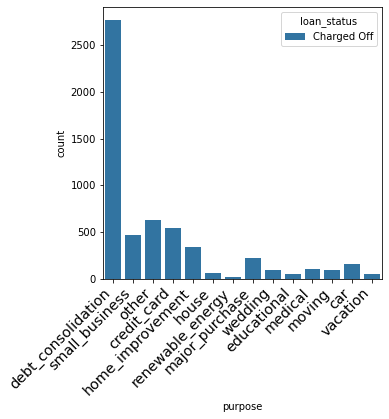

In [17]:
plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.countplot(data=loan_df_CO, x= 'purpose', hue='loan_status')
plt.show()

In [18]:
def is_blank(x):
    return x == 0 


agg_income_b1 = loan_df_CO[(loan_df.income_b <= 200)].groupby('income_b').id.value_counts().sum()
agg_income_b1 = agg_income_b1.astype(float).round(2)

agg_income_b2 = loan_df_CO[(loan_df.income_b > 200)].groupby('income_b').id.value_counts().sum()

agg_income_b2 = agg_income_b2.astype(float).round(2)

print ("<= 200K loan defaulters%", (agg_income_b1/(agg_income_b1 + agg_income_b2)*100).round(2))
print ("> 200K loan defaulters%", (agg_income_b2/(agg_income_b1 + agg_income_b2)*100).round(2))



<= 200K loan defaulters% 98.93
> 200K loan defaulters% 1.07


C:\Users\sdhad\AppData\Local\Temp\ipykernel_20288\3538942747.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agg_income_b1 = loan_df_CO[(loan_df.income_b <= 200)].groupby('income_b').id.value_counts().sum()
C:\Users\sdhad\AppData\Local\Temp\ipykernel_20288\3538942747.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agg_income_b2 = loan_df_CO[(loan_df.income_b > 200)].groupby('income_b').id.value_counts().sum()


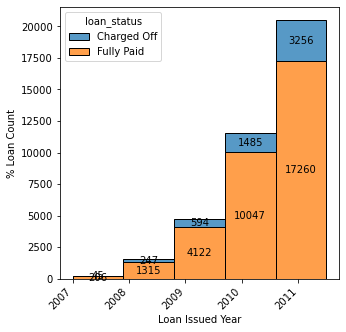

In [19]:
# derived variable as issue year 

from datetime import datetime

date = datetime.strptime(loan_df['issue_d'][0], '%b-%y')
date.year

loan_df['issue_y'] = loan_df['issue_d'].apply(lambda x:datetime.strptime(x, '%b-%y').year)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

ax= sns.histplot(binwidth=0.9, x="issue_y", hue="loan_status", data=loan_df, stat="count",  multiple="stack")
ax.bar_label(ax.containers[0],  label_type='center', fontsize=10)
ax.bar_label(ax.containers[1],  label_type='center', fontsize=10)
plt.xlabel('Loan Issued Year')
plt.ylabel('% Loan Count')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

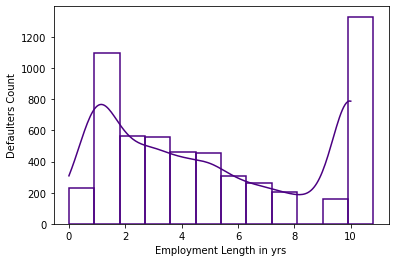

In [20]:

# client employment length Vs defaulters count 
# defaulters are trending down as employment length is increasing till 8 years but 10+ years again major defaulter risk

loan_df.emp_len = loan_df.emp_len.sort_values()
sns.histplot(binwidth=0.9, x="emp_len", data=loan_df_CO, stat="count", multiple="stack", kde=True, fill= False, color='indigo')
plt.ylabel('Defaulters Count')
plt.xlabel('Employment Length in yrs')
plt.show()


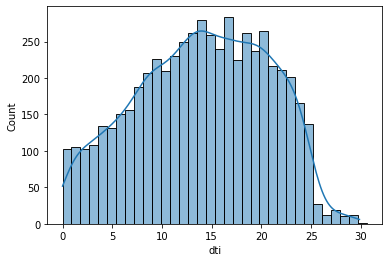

In [21]:
sns.histplot(binwidth=0.9, x="dti", data=loan_df_CO, stat="count", multiple="stack", kde=True)

plt.show()

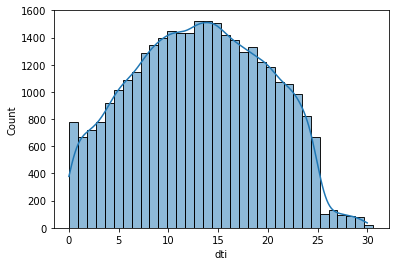

In [22]:
sns.histplot(binwidth=0.9, x="dti", data=loan_df_FP, stat="count", multiple="stack", kde=True)

plt.show()

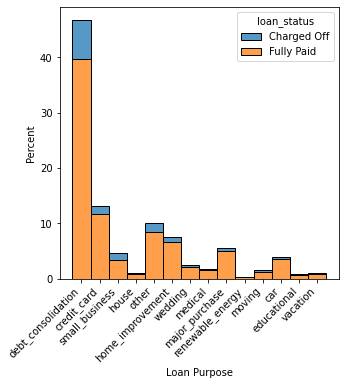

In [42]:
# plot bar chart to dipict loan purpose Vs loan status

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10  
)

sns.histplot(binwidth=0.9, x="purpose", hue="loan_status", data=loan_df, stat="percent", multiple="stack")
plt.xlabel('Loan Purpose')
plt.show()

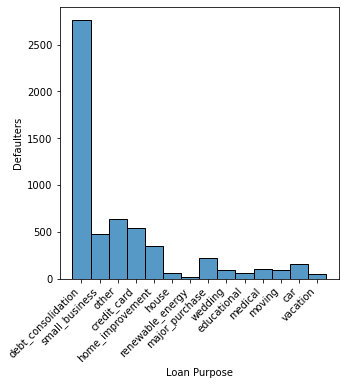

In [24]:
plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize= 10 
)

sns.histplot(binwidth=0.9, x="purpose", data=loan_df_CO, stat="count", multiple="stack")
plt.xlabel("Loan Purpose")
plt.ylabel("Defaulters")
plt.show()

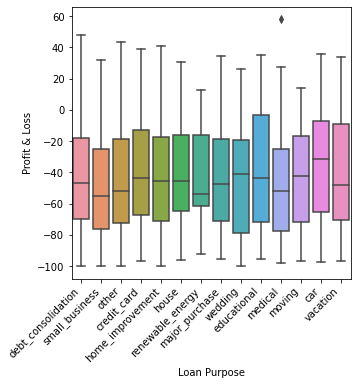

In [25]:
plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10  
)

sns.boxplot(x="purpose", y= "P_L", data=loan_df_CO)
plt.xlabel("Loan Purpose")
plt.ylabel("Profit & Loss")
plt.show()


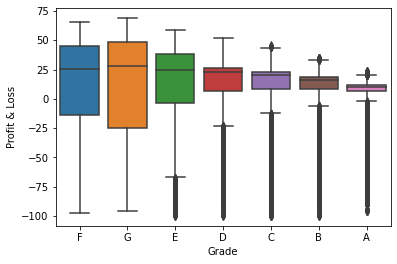

In [26]:
#grade wise defaulter Profit & Loss %

sns.boxplot(x="grade", y= "P_L", data=loan_df)

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.ylabel("Profit & Loss")
plt.xlabel("Grade")
plt.show()

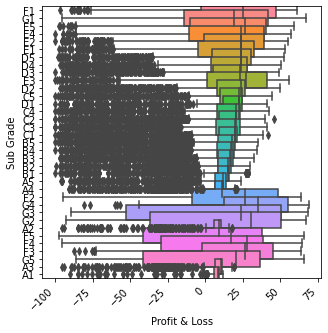

In [27]:
#sub grade wise defaulter Profit & Loss %

plt.figure(figsize=(5,5))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

sns.boxplot(y="sub_grade", x= "P_L", data=loan_df, saturation=2, width=2, dodge=True, fliersize=5)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Profit & Loss")
plt.ylabel("Sub Grade")
plt.show()

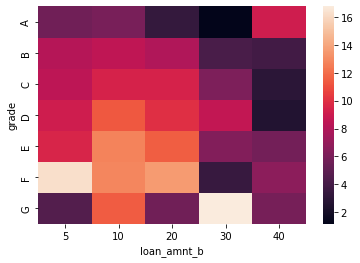

In [28]:
res = pd.pivot_table(data= loan_df, index="grade", columns="loan_amnt_b", values="P_L", aggfunc="mean")
sns.heatmap(res)
ax.bar_label(ax.containers[0], fmt='%%K', label_type='center')
plt.show()

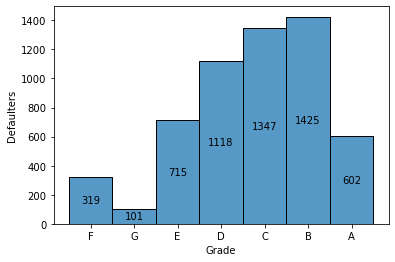

In [29]:
# grade wise defaulters count 
ax = sns.histplot(binwidth=0.9, x="grade", data=loan_df_CO, stat="count", multiple="stack")

ax.bar_label(ax.containers[0], label_type='center')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Grade")
plt.ylabel("Defaulters")

plt.show()


In [30]:
# grade wise defaulters count 


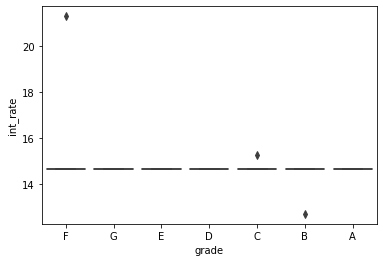

In [31]:
sns.boxplot(x="grade", y= "int_rate", data=loan_df_CO)

plt.show()


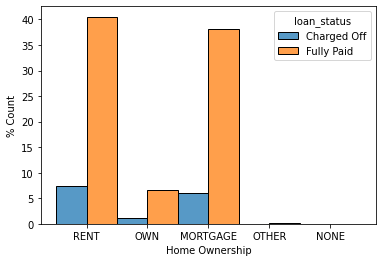

In [46]:
# home ownership 

sns.histplot(binwidth=1, x="home_ownership", hue="loan_status", data=loan_df, stat="percent", multiple="dodge")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Home Ownership")
plt.ylabel("% Count")


plt.show()

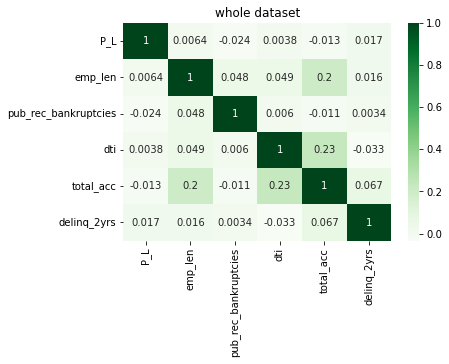

In [33]:
df_whole = loan_df[['P_L','emp_len','pub_rec_bankruptcies',  'dti', 'total_acc', 'delinq_2yrs']]

whole_corr = df_whole.corr()

plt.title ("whole dataset")

sns.heatmap(whole_corr, cmap="Greens", annot=True)
plt.show()


C:\Users\sdhad\AppData\Local\Temp\ipykernel_20288\1361915620.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Geeks', 'for', 'geeks', '!'])
C:\Users\sdhad\AppData\Local\Temp\ipykernel_20288\1361915620.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Geeks', 'for', 'geeks', '!'])


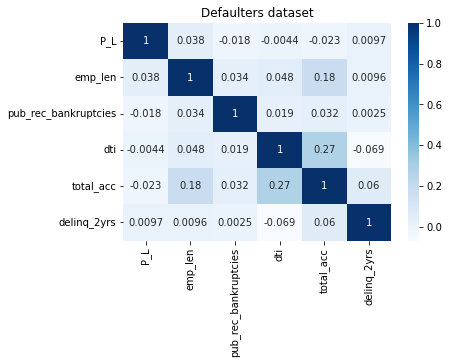

In [34]:
df_CO = loan_df_CO[['P_L','emp_len','pub_rec_bankruptcies',  'dti', 'total_acc', 'delinq_2yrs']]

CO_corr = df_CO.corr()

sns.heatmap(CO_corr, cmap="Blues", annot=True)

ax.set_xticklabels(['Geeks', 'for', 'geeks', '!'])
ax.set_yticklabels(['Geeks', 'for', 'geeks', '!'])

plt.title ("Defaulters dataset")
plt.show()

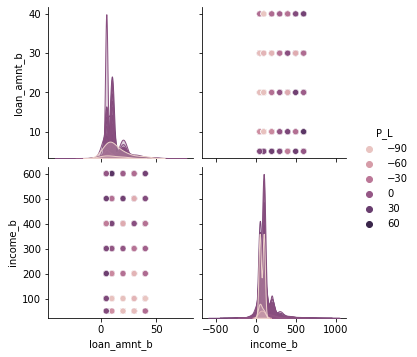

In [35]:
sns.pairplot(loan_df[[ 'P_L', 'loan_amnt_b', 'income_b']], hue='P_L')
plt.show()
